> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset -(No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, we will be investigating the No-show Appointments dataset. It contains a 100k recored of medical appointments in Brazil and is mainly focused around if the patient made it to the appointment or not. We will be looking into patterns of the no shows and other related attributes. 


### Question(s) for Analysis
-	What is the Percentage of patients who attended or not attended (Show or No_show)   their appointment
-	How far the gender of the patient is affecting on the attendance?
-	Is the attendance affected by the neighborhood of the hospital?
-	What is the age range of the patients?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline\

In [14]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Data Wrangling

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We can notes .

ScheduledDay has a time part, while AppointmentDay time part is not given (00:00:00). Some columns name are wrong.

In [13]:
# check number of rows and coulmns
df.shape

(110527, 14)

110,527 samples (rows) and 14 columns.

In [16]:
# check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


ScheduledDay and AppointmentDay should be datetime not object (string).

In [18]:
# check for duplicated rows
df.duplicated().sum()

0

There aren't any duplicated

In [20]:
# check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There aren't any missing values in any column.

In [22]:
# Check information about dataset's distribution
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The average age in this dataset is 37, and the heighest age is 115, while -1 is the minimum age which is an issue that will be fixed later.

In [24]:
# Check number of non-null unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


## Data Cleaning

### - Spelling Errors and style

In [27]:
df.rename(columns = {'Handcap': 'Handicap', 'Hipertension': 'Hypertension', 'No-show': 'No_show'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### - Handle incorrect data

In [29]:
print('minimum age:',df['Age'].min())

minimum age: -1


In [31]:
df = df.drop(df[df["Age"]==-1].index)
df['Age'].min()

0

### - Drop unnecessary Coulumns

In [32]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis


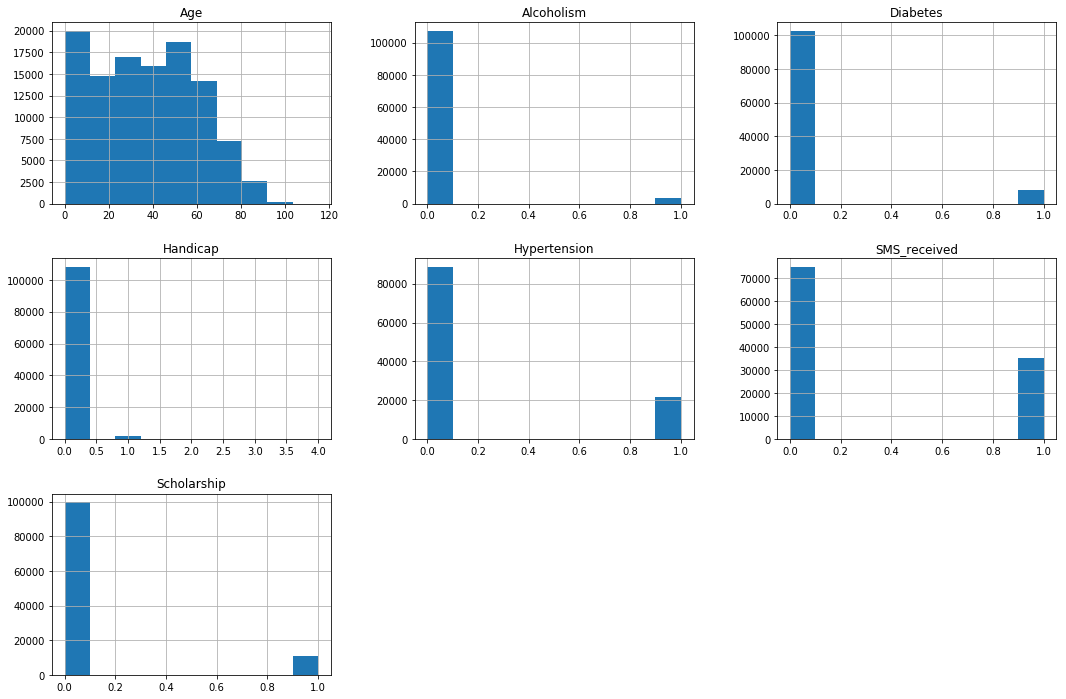

In [34]:
df.hist(figsize=(18,12));

## - Histogram Notes

### Research Questions 

In [35]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

### 1 what percentage of patients did not show up for their appointment 

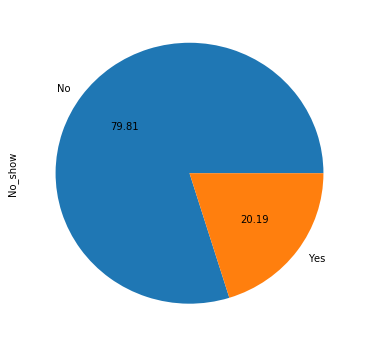

In [38]:
df.groupby("No_show")["No_show"].count().plot(figsize=(6,6),kind="pie",autopct='%.2f');

The figure above shows that just 20% of appointments are no show and the rest attended

### 2 Is the gender affect on patients showing up?

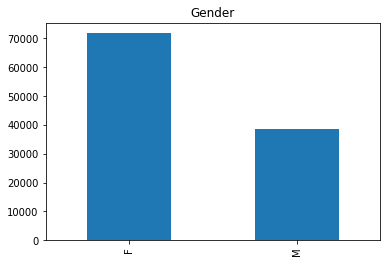

In [41]:
df.Gender.value_counts().plot(kind="bar")
plt.title("Gender");

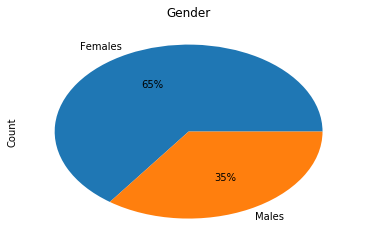

In [43]:
df["Gender"].value_counts().plot(kind="pie",labels=["Females","Males"],   autopct='%1.0f%%')
plt.ylabel("Count")
plt.title("Gender");

From the above, it is clear that there are much more females making appointments than males.
Women amount to 65% while men amount to 35%

### 3 -	Is the attendance affected by the neighborhood of the hospital?

In [45]:
neighborhood = df['Neighbourhood'].value_counts().iloc[:5]

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighbourhood, dtype: int64

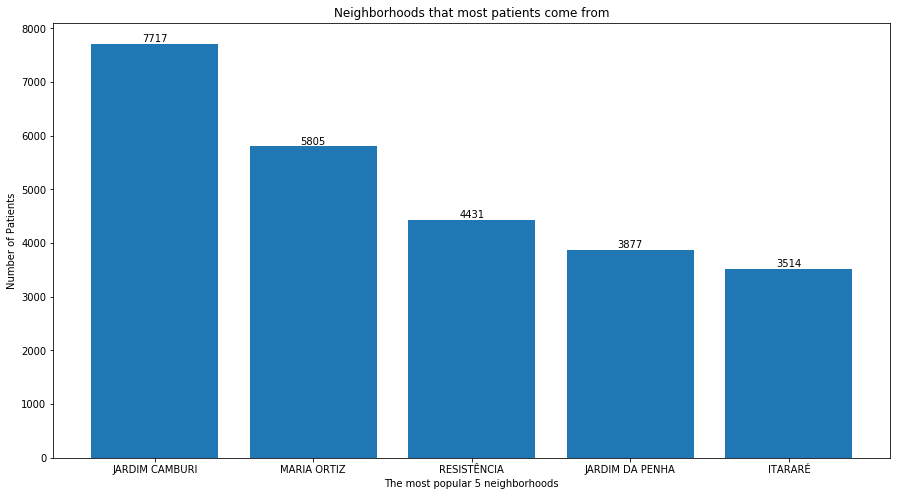

In [47]:
plt.figure(figsize=(15,8))
bar1 = plt.bar([1,2,3,4,5], neighborhood.values, tick_label=neighborhood.index)
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom')
plt.title('Neighborhoods that most patients come from')
plt.xlabel('The most popular 5 neighborhoods')
plt.ylabel('Number of Patients');
neighborhood

Most of the patients live in Jardim Camburi, Maria Ortiz, Jardim Da Penha, Resistencia and Itarare.

### 4 -	What is the age range of the patients?

In [49]:
age = df['Age']

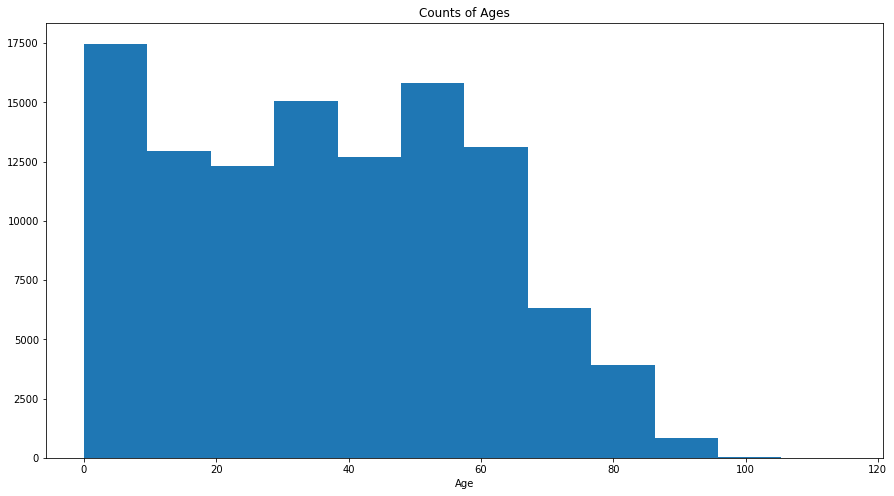

In [51]:
plt.figure(figsize=(15,8))
plt.hist(age, 12)
plt.title('Counts of Ages')
plt.xlabel('Age');

Most of the patient are children and adults

## Conclusions

Based on the tentative research that was made, noting the limitations of operations that were performed, here are some findings

Percentage:
 Percentage of patients who show up their appointments are 79.81% .
 Percentage of patients who missed their appointments are 20.19% .
 
Gender :
 females has higher percentage of the appointments
 
Neighborhood :
 it's found that the portion of appointments for neighborhood are widely varied but the percentage of attendance are almost  close 
 
Age :
 Patients between the ages of 0-17 are the highest to show up during appointments whereas 18-36 age groups are the highest who do not turn up on appointment days

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# limitations

1-The dataset not providing the status of the patient of having a job or not, student or not. providing that would be an affecting factor on the investigation

2-There is many patients with age zero which i want to ask about is it wrong entering or babies less than year

3-The period of time in which all this information was recorded is short. It would be better if the the period of time of the records increases.

 

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0